<a href="https://colab.research.google.com/github/DolapoSalim/Numpy-Seras-Seaborn-and-LSTM/blob/main/time_series_with_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LOAD LIBRARIES**

Import all the libraries; *TensorFlow*, *os*, *panda*, *numpy*. This helps to set up the Environment by loading the required tools we need to perform the analysis.


This script follows the tutorial by [Greg Hogg](https://www.youtube.com/watch?v=c0k-YLQGKjY&t=1403s&ab_channel=GregHogg) from YouTube


In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

In [33]:
file_location = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(file_location)

In [34]:
df = pd.read_csv(file_location)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [35]:
df = df[5::6]

In [36]:
df.head(15)
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:12]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


<Axes: xlabel='Year(date)', ylabel='Temperature (degC)'>

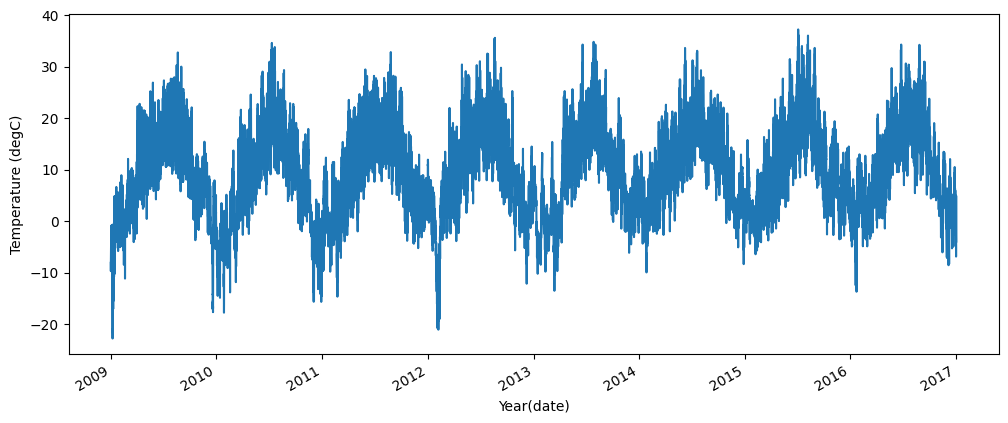

In [37]:
temp = df['T (degC)']
temp.plot(figsize=(12, 5), ylabel='Temperature (degC)', xlabel='Year(date)') #Labelling the axes

CREATING A FUNCTION AIMED AT TRANSFORMING THE DATA INTO TWO NUMPY ARRAYS TO ASSIGN FOR X values and Y values

In [38]:
#[[[1],[2],[3],[4],[5]]] [6]
#[[[2],[3],[4],[5],[6]]] [7]
#[[[3],[4],[5],[6],[7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)


In [39]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

VALIDATE MODEL and SET THE PARAMETERS

In [40]:
X_train, y_train = X[:60000], y[:60000]
X_valid, y_valid = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

Defining and setting up a neural network model using TensorFlow and Keras for the time prediction (also the loss function variables), by importing the Tensorflow and creating the modelusing *Sequential* as the base of the neural network, adding *LSTM* layer with 64 units, *Relu* activation function for dense layer (non linearity)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
cp = ModelCheckpoint('model1/model.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [47]:
model1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, callbacks=[cp])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 56.3901 - root_mean_squared_error: 7.2136 - val_loss: 1.3225 - val_root_mean_squared_error: 1.1500
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 2.5823 - root_mean_squared_error: 1.6027 - val_loss: 0.6836 - val_root_mean_squared_error: 0.8268
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.9923 - root_mean_squared_error: 0.9958 - val_loss: 0.5535 - val_root_mean_squared_error: 0.7440
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.7879 - root_mean_squared_error: 0.8872 - val_loss: 0.5286 - val_root_mean_squared_error: 0.7270
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.7120 - root_mean_squared_error: 0.8437 - val_loss: 0.4990 - val_root_mean_squared_error: 0.7064
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6632 - root_mean_squared_error: 0.8142 - val_loss: 0.4975 - val_root_mean_squared_error: 0.7053
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━

In [50]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/model.keras')

In [51]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


,Train Predictions,Actuals
0,-9.825496,-9.67
1,-9.595267,-9.17
2,-8.643337,-8.10
3,-7.158676,-7.66
4,-7.050422,-7.04
...,...,...
59995,6.189522,6.07
59996,7.166818,9.88
59997,12.151196,13.53
59998,15.665446,15.43


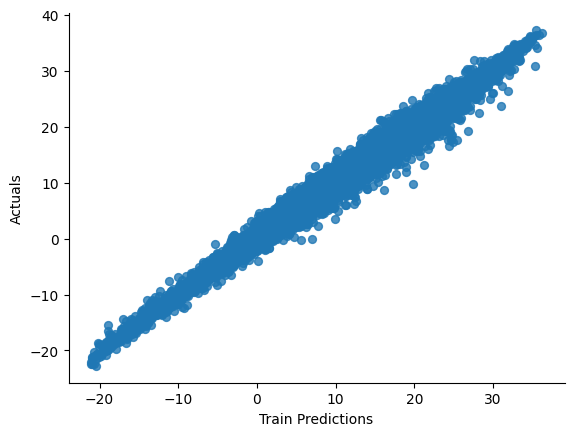

In [63]:
# @title Train Predictions vs Actuals

from matplotlib import pyplot as plt
train_results.plot(kind='scatter', x='Train Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

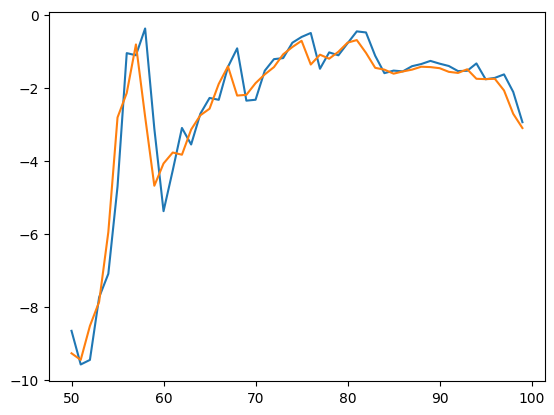

In [62]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [56]:
val_predictions = model1.predict(X_valid).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_valid})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Val Predictions,Actuals
0,15.398601,14.02
1,13.101007,13.67
2,13.026752,12.27
3,11.377649,11.19
4,10.371370,10.85
...,...,...
4995,17.301767,18.27
4996,17.394236,17.85
4997,17.158619,16.65
4998,15.799314,15.85


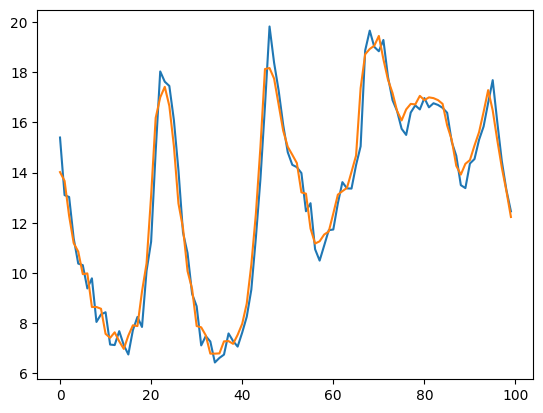

In [59]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [60]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Test Predictions,Actuals
0,14.357015,13.99
1,13.178746,13.46
2,12.827377,12.93
3,12.408638,12.43
4,11.960275,12.17
...,...,...
5081,-1.056018,-0.98
5082,-1.478544,-1.40
5083,-1.695173,-2.75
5084,-3.048224,-2.89


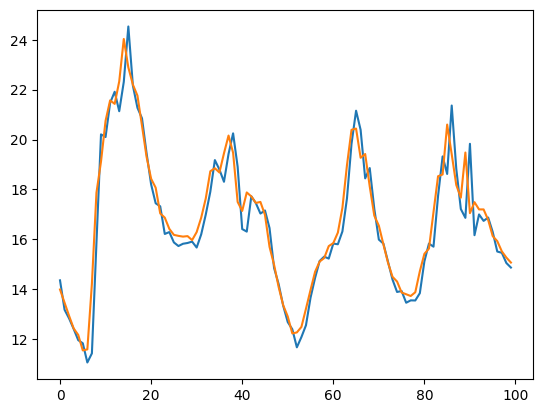

In [61]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])